written for https://stackoverflow.com/q/49928939/425458

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


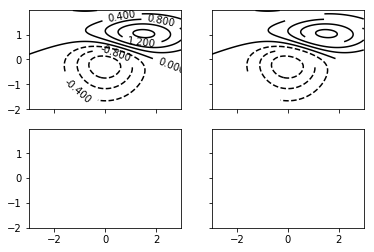

In [108]:
from copy import copy as shallowcopy
import numpy as np
import matplotlib as mpl
import matplotlib.mlab as mlab

def draw_contour(ax):
    delta = 0.025
    x = np.arange(-3.0, 3.0, delta)
    y = np.arange(-2.0, 2.0, delta)
    X, Y = np.meshgrid(x, y)
    Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
    Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
    # difference of Gaussians
    Z = 10.0 * (Z2 - Z1)
    C = ax.contour(X, Y, Z, colors='k')
    return C

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=True, sharey=True)
CS = draw_contour(ax1)
ax1.clabel(CS, inline=1, fontsize=10)

for c in CS.collections:
    cc = shallowcopy(c)
    cc.axes = None
    cc.figure = None
    cc.set_transform(ax2.transData)
    ax2.add_collection(cc)


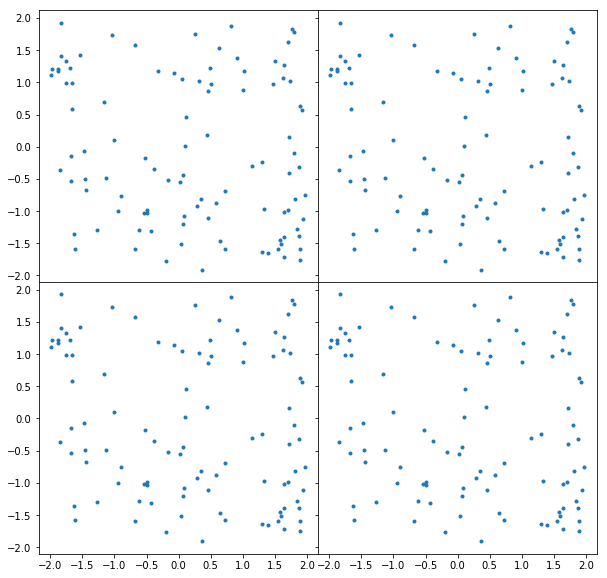

In [191]:
from copy import copy as shallowcopy
import numpy as np
import matplotlib as mpl
import matplotlib.mlab as mlab

def copy_artist(x, axdst):
    xc = shallowcopy(x)
    xc.axes = None
    xc.figure = None
    xc.set_transform(axdst.transData)
    axdst.add_artist(xc)

def copy_ax(axsrc, *axdsts):
    for axdst in axdsts:
        # don't need the last 10 items (frame, spines, etc) in get_children
        for c in axsrc.get_children()[:-10]:
            copy_artist(c, axdst)

def get_xyz():
    delta = 0.025
    x = np.arange(-3.0, 3.0, delta)
    y = np.arange(-2.0, 2.0, delta)
    X, Y = np.meshgrid(x, y)
    Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
    Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
    # difference of Gaussians
    Z = 10.0 * (Z2 - Z1)
    
    return X,Y,Z
            
def draw_contour(ax, label=True):
    X,Y,Z = get_xyz()
    C = ax.contour(X, Y, Z, colors='k')
    
    if label:
        ax.clabel(C, inline=1, fontsize=10)
    
    return C

def draw_mesh(ax):
    X,Y,Z = get_xyz()
    C = ax.pcolormesh(X, Y, Z)
    return C

def draw_scatter(ax):
    x = np.random.uniform(-2,2,size=100)
    y = np.random.uniform(-2,2,size=100)
    return ax.plot(x,y,ls='none',marker='.')

subplots_kw = {
    'sharex': True, 
    'sharey': True, 
    'figsize': (10,10),
    'gridspec_kw': {
        'hspace': 0,
        'wspace': 0
    }
}
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, **subplots_kw)

draw_scatter(ax1)
copy_ax(ax1, ax2, ax3, ax4)

fig.savefig('/Users/tel/Desktop/plt.png', bbox_inches='tight')

In [200]:
np.arange(5) + np.arange(3)[:, None]

array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6]])

In [201]:
def multislice(*slyces):
    for slyce in slyces:
        print(slyce)
        
multislice(:4,5:)

SyntaxError: invalid syntax (<ipython-input-201-45d41e0a1dc4>, line 5)

In [ ]:
def draw_scatter(ax):
    x = np.random.uniform(-2,2,size=100)
    y = np.random.uniform(-2,2,size=100)
    return ax.plot(x,y,ls='none',marker='.')

subplots_kw = {
    'sharex': True, 
    'sharey': True, 
    'figsize': (10,10),
    'gridspec_kw': {
        'hspace': 0,
        'wspace': 0
    }
}
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, **subplots_kw)

draw_scatter(ax1)
for ax in (ax2, ax3, ax4):
    copy_ax(ax1, ax)

In [188]:
ax2.lines

[]

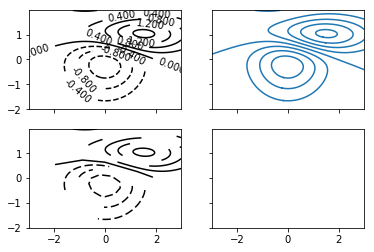

In [69]:
import numpy as np
import matplotlib as mpl
import matplotlib.mlab as mlab

def draw_contour(ax):
    delta = 0.025
    x = np.arange(-3.0, 3.0, delta)
    y = np.arange(-2.0, 2.0, delta)
    X, Y = np.meshgrid(x, y)
    Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
    Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
    # difference of Gaussians
    Z = 10.0 * (Z2 - Z1)
    C = ax.contour(X, Y, Z, colors='k')
    return C

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=True, sharey=True)
plt.sca(ax1)
CS = draw_contour()
plt.clabel(CS, inline=1, fontsize=10)
# plt.show()

for segs in CS.allsegs:
    for seg in segs:
        line = plt.Line2D(seg[:,0], seg[:,1])
        ax2.add_line(line)
ax2.clabel(CS, inline=1, fontsize=10)

for c in (child for child in ax1.get_children() if isinstance(child, mpl.collections.LineCollection)):
#     for paths in c.get_paths():
#         l = Line2D(paths[:,0], paths[:,1], linewidth=c.get_linewidth(),
#                           color=c.get_color(),
#                           linestype=c.get_linestyle())
#     ax3.add_line(l)
    
    cnew = mpl.collections.LineCollection(c.get_segments(),
                               linewidths=c.get_linewidths(), 
                               colors=c.get_colors(),
                               linestyles=c.get_linestyles())
    
    cnew.set_antialiased(True)
    ax3.add_collection(cnew)
# for seg in ax1.get_lines():
#     print('line')
#     line = Line2D(*line.get_data())
#     line.update_from(seg)
#     ax3.add_line(line)

# # ax2.add_artist(CS)
# for c in CS.collections:
#     cc = shallowcopy(c)
#     cc.axes = None
# #     cc.axes = ax2
# #     cc.draw()
#     ax2.add_collection(cc)
# ax2.draw(fig.canvas.renderer)
# # redraw CS
# plt.show()

AttributeError: 'LineCollection' object has no attribute '_axes'

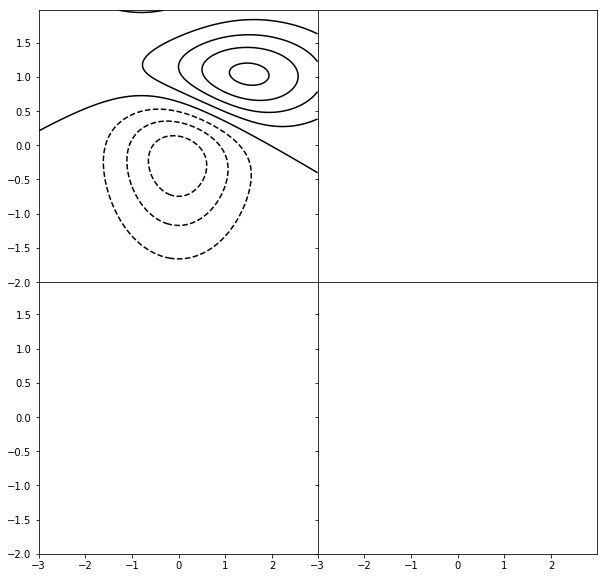

In [165]:
import numpy as np
import matplotlib as mpl
import matplotlib.mlab as mlab

def get_xyz():
    delta = 0.025
    x = np.arange(-3.0, 3.0, delta)
    y = np.arange(-2.0, 2.0, delta)
    X, Y = np.meshgrid(x, y)
    Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
    Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
    # difference of Gaussians
    Z = 10.0 * (Z2 - Z1)

    return X,Y,Z

def draw_contour(ax):
    X,Y,Z = get_xyz()
    C = ax.contour(X, Y, Z, colors='k')
    return C

def draw_mesh(ax):
    X,Y,Z = get_xyz()
    C = ax.pcolormesh(X, Y, Z)
    return C

def draw_scatter(ax):
    X,Y,Z = get_xyz()
    C = ax.scatter(X.flat, Y.T.flat, s=np.abs(Z).flat)
    return C

def copy_collection(x, axdst):
#     xnew = object()
#     xnew.__class__ = x.__class__
    xnew = x.__class__.__new__(x.__class__)
    
    for attr in ('_animated', '_propobservers', '_sticky_edges', 'stale_callback'):
        if hasattr(x, attr):
            setattr(xnew, attr, getattr(x, attr))
    
    xnew.update_from(x)
    xnew.set_transform(axdst.transData)
#     if isinstance(xnew, mpl.collections.LineCollection):
#         xnew
    
    axdst.add_collection(xnew)

# dfix is a hack to fix dashing size in copied lines. May need to adjust
def copy_linecollection(x, axdst, dfix=1.5):
    ls = [(ls[0], (ls[1][0]/dfix, ls[1][1]/dfix)) if ls[0] is not None else ls for ls in x.get_linestyles()]

    axdst.add_collection(mpl.collections.LineCollection(
        [p.vertices for p in x.get_paths()],
        linewidths=x.get_linewidths(), 
        colors=x.get_colors(),
        linestyles=ls,
    ))

def copy_text(x, axdst):
    axdst.text(
        *x.get_position(), 
        s=x.get_text(),
        color=x.get_color(), 
        verticalalignment=x.get_verticalalignment(), 
        horizontalalignment=x.get_horizontalalignment(), 
        fontproperties=x.get_fontproperties(), 
        rotation=x.get_rotation(),
        clip_box=axdst.get_position(),
        clip_on=True
    )

def copy_ax(axsrc, axdst):
    for c in axsrc.get_children():
        if isinstance(c, mpl.collections.LineCollection):
            copy_collection(c, axdst)

        elif isinstance(c, mpl.text.Text) and c.get_text():
            copy_text(c, axdst)

subplots_kw = {
    'sharex': True, 
    'sharey': True, 
    'figsize': (10,10),
    'gridspec_kw': {
        'hspace': 0,
        'wspace': 0
    }
}
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, **subplots_kw)

CS = draw_contour(ax1)
#     ax1.clabel(CS, inline=1, fontsize=10)

for ax in (ax2,ax3,ax4):
    copy_ax(ax1, ax)

In [159]:
%debug

> /usr/local/lib/python3.6/site-packages/matplotlib/artist.py(913)sticky_edges()
    911 
    912         """
--> 913         return self._sticky_edges
    914 
    915     def update_from(self, other):

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_offsets', '_alpha', '_bcast_lwls', '_clipon', '_clippath', '_edge_default', '_label', '_offsets', '_path_effects', '_prepare_points', '_prop_order', '_set_edgecolor', '_set_facecolor', '_set_gc_clip', '_sketch', '_transOffset', '_transform', '_transformSet', '_transforms', '_visible', 'add_callback', 'add_checker', 'aname', 'autoscale', 'autoscale_None', 'axes', 'changed', 'check_update', 'clipbox', 'contains', 'convert_xunit

In [153]:
ax1.get_children()[0]

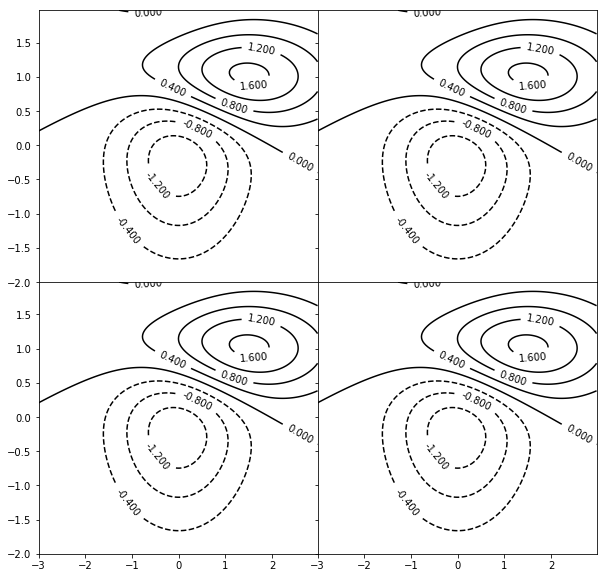

In [97]:
    import numpy as np
    import matplotlib as mpl
    import matplotlib.mlab as mlab

    def draw_contour(ax):
        delta = 0.025
        x = np.arange(-3.0, 3.0, delta)
        y = np.arange(-2.0, 2.0, delta)
        X, Y = np.meshgrid(x, y)
        Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
        Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
        # difference of Gaussians
        Z = 10.0 * (Z2 - Z1)
        C = ax.contour(X, Y, Z, colors='k')
        return C
    
    # dfix is a hack to fix dashing size in copied lines. May need to adjust
    def copy_linecollection(x, axdst, dfix=1.5):
        ls = [(ls[0], (ls[1][0]/dfix, ls[1][1]/dfix)) if ls[0] is not None else ls for ls in x.get_linestyles()]
                
        axdst.add_collection(mpl.collections.LineCollection(
            [p.vertices for p in x.get_paths()],
            linewidths=x.get_linewidths(), 
            colors=x.get_colors(),
            linestyles=ls,
        ))
        
    def copy_text(x, axdst):
        axdst.text(
            *x.get_position(), 
            s=x.get_text(),
            color=x.get_color(), 
            verticalalignment=x.get_verticalalignment(), 
            horizontalalignment=x.get_horizontalalignment(), 
            fontproperties=x.get_fontproperties(), 
            rotation=x.get_rotation(),
            clip_box=axdst.get_position(),
            clip_on=True
        )
        
    def copy_ax(axsrc, axdst):
        for c in axsrc.get_children():
            if isinstance(c, mpl.collections.LineCollection):
                copy_linecollection(c, axdst)
                
            elif isinstance(c, mpl.text.Text) and c.get_text():
                copy_text(c, axdst)
    
    subplots_kw = {
        'sharex': True, 
        'sharey': True, 
        'figsize': (10,10),
        'gridspec_kw': {
            'hspace': 0,
            'wspace': 0
        }
    }
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, **subplots_kw)
    
    CS = draw_contour(ax1)
    ax1.clabel(CS, inline=1, fontsize=10)
    
    for ax in (ax2,ax3,ax4):
        copy_ax(ax1, ax)

    fig.savefig('/Users/tel/Desktop/plt.png', bbox_inches='tight')

In [99]:
ax1.patches

[]

In [100]:
for c in ax1.get_children():
    if isinstance(c, mpl.collections.LineCollection):
        ls = [(ls[0], (ls[1][0]/2.0, ls[1][1]/2.0)) if ls[0] is not None else ls for ls in c.get_linestyles()]

In [79]:
c = ax1.get_children()[5]
c.get_linestyle()

[(None, None)]

In [21]:
t = ax1.get_children()[10]
t.get_prop_tup()

(-1.1000000000000068,
 -1.245744355993657,
 '-0.400',
 (0.0, 0.0, 0.0, 1.0),
 'center',
 'center',
 7241497388703705261,
 -51.921717963341251,
 None,
 72.0,
 <weakref at 0x1146bc818; to 'RendererAgg' at 0x1138d49b0>,
 1.2)

In [54]:
cs = [child for child in ax1.get_children() if isinstance(child, mpl.collections.LineCollection)]

cs[1].get_children()

[]